**Neural Network Regression in Tensorflow**

In [1]:
import tensorflow as tf


In [2]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.12.0
Notebook last run (end-to-end): 2025-11-22 23:56:57.737207


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Make a dataset
X=np.arange(-100,100,4)

In [5]:
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [6]:
y=np.arange(-90,110,4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [7]:
len(X)

50

In [8]:
X_train=X[:40]
y_train=y[:40]

X_test= X[40:]
y_test= y[40:]

len(X_train), len(X_test)

(40, 10)

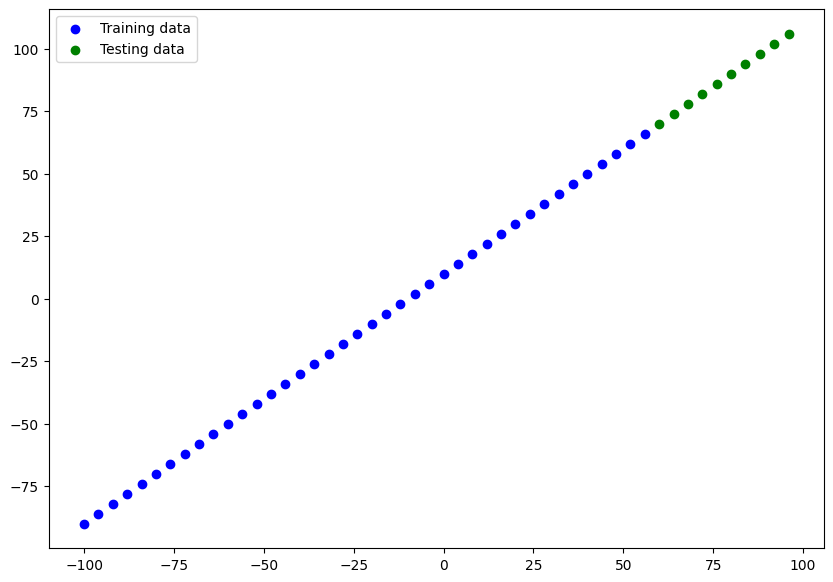

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train, color="blue", label='Training data')
plt.scatter(X_test,y_test,color='green',label='Testing data')
plt.legend();


In [10]:
#Set a random seed
tf.random.set_seed(42)
 
#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#create a compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
#Fit model 


In [11]:
#Set a random seed
tf.random.set_seed(42)
 
#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])
#create a compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
#Fit model 


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [13]:
#Fit the model
model.fit(X_train,y_train, epochs=100, verbose=0)

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [15]:
y_preds = model.predict(X_test)


1/1 [==============================] - 0s 57ms/step


In [16]:
y_preds

array([[56.468933],
       [60.14807 ],
       [63.82721 ],
       [67.50635 ],
       [71.185486],
       [74.864624],
       [78.543755],
       [82.22289 ],
       [85.90203 ],
       [89.58117 ]], dtype=float32)

In [17]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels, c='b', label="Training data")
    plt.scatter(test_data,test_labels,c='g', label='Testing Data')
    plt.scatter(test_data, predictions, c='r', label='predictions')
    plt.legend();

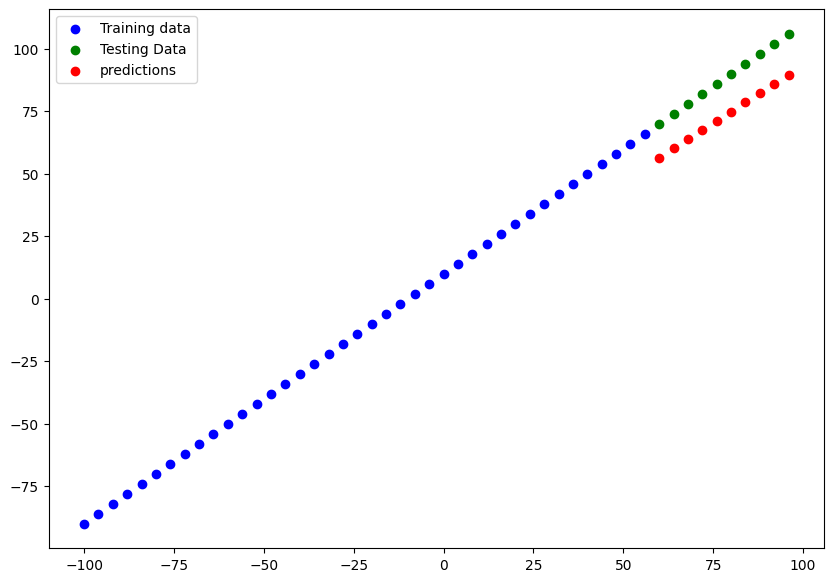

In [18]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds)

In [19]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 93ms/step - loss: 14.9749 - mae: 14.9749


[14.974947929382324, 14.974947929382324]

In [20]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([31.531067, 27.851929, 24.17279 , 20.493652, 17.05161 , 14.281225,
       12.182498, 10.755422, 10.019594, 10.      ], dtype=float32)>

In [21]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [22]:
y_preds

array([[56.468933],
       [60.14807 ],
       [63.82721 ],
       [67.50635 ],
       [71.185486],
       [74.864624],
       [78.543755],
       [82.22289 ],
       [85.90203 ],
       [89.58117 ]], dtype=float32)

In [23]:
y_test.shape, y_preds.shape

((10,), (10, 1))

In [24]:
y_preds.shape

(10, 1)

In [25]:
y_preds.squeeze().shape

(10,)

In [26]:
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([56.468933, 60.14807 , 63.82721 , 67.50635 , 71.185486, 74.864624,
        78.543755, 82.22289 , 85.90203 , 89.58117 ], dtype=float32))

In [27]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) 
mae

<tf.Tensor: shape=(), dtype=float32, numpy=14.974948>

In [28]:
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=225.09843>

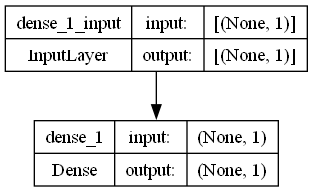

In [29]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [30]:
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=14.974948120117187>

In [31]:
def mae(y_test,y_pred): # mean absolute error 
    return tf.metrics.mae(y_test,y_pred)
def mse(y_test, y_pred): #mean squared error
    return tf.metrics.mse(y_test,y_pred)


**Improve a Model-1**

In [32]:
#set seed
tf.random.set_seed(42)
#model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#comiler
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics='mae')
#Fit model
model_1.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 38.6152 - mae: 38.6152
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 10.8281 - mae: 10.8281
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.4996 - mae: 11.4996
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.4527 - mae: 9.4527
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.3433 - mae: 10.3433
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.5860 - mae: 9.5860
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.7016 - mae: 8.7016
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0626 - mae: 9.0626
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 19.0658 - mae: 19.0658
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.2944 - mae: 10.2944
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 30ms/step


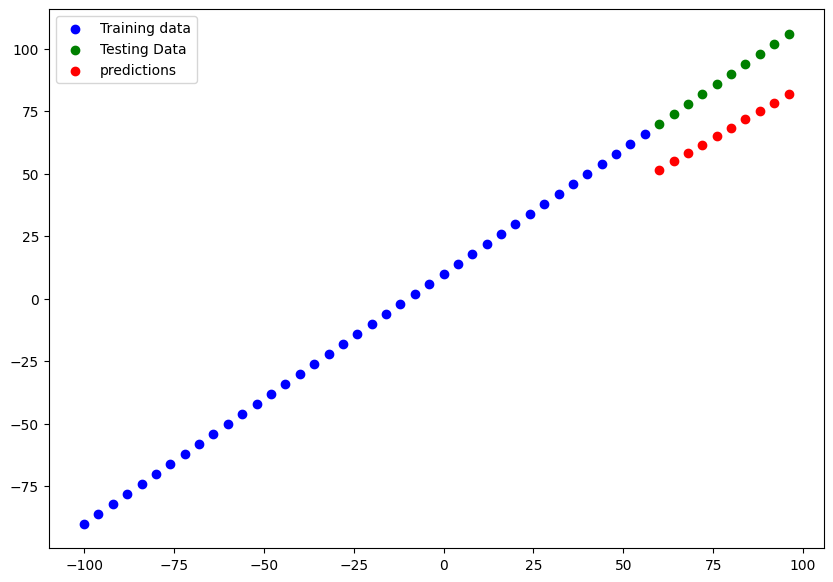

In [33]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [34]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(21.261444, 455.4799)

**Impore Model-2**

In [35]:
#SET seed a random seed
tf.random.set_seed(42)

#squential model
model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
#Create a compile
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
#fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 54ms/step


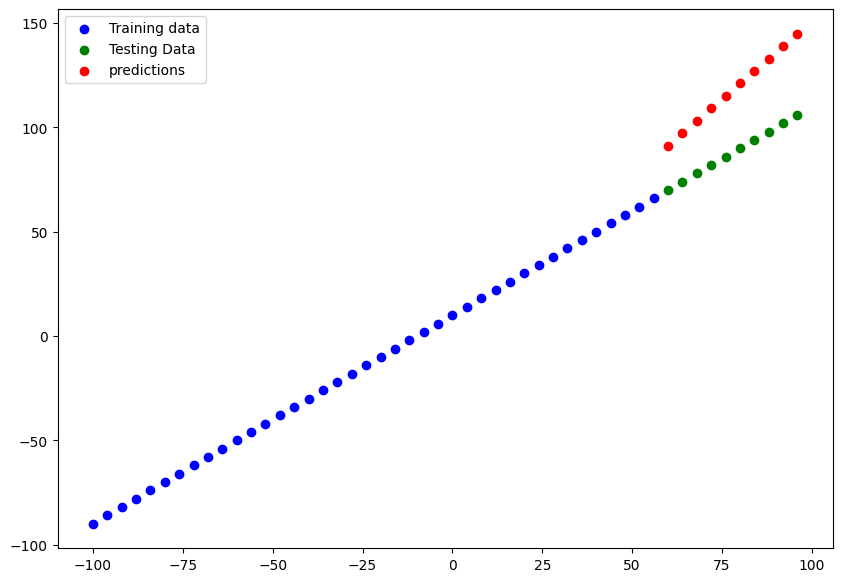

In [36]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [37]:
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(30.071478, 935.9404)

**Improve model-3**

In [38]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500) # set verbose to 0 for less output

Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 15.8724 - mae: 15.8724
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 10.8733 - mae: 10.8733
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 15.6953 - mae: 15.6953
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: 13.6259 - mae: 13.6259
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 14.9597 - mae: 14.9597
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 11.8730 - mae: 11.8730
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 11.1732 - mae: 11.1732
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: 11.0266 - mae: 11.0266
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 40.3906 - mae: 40.3906
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 27.8032 - mae: 27.8032
Epoch 11/500
2/2 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 41ms/step


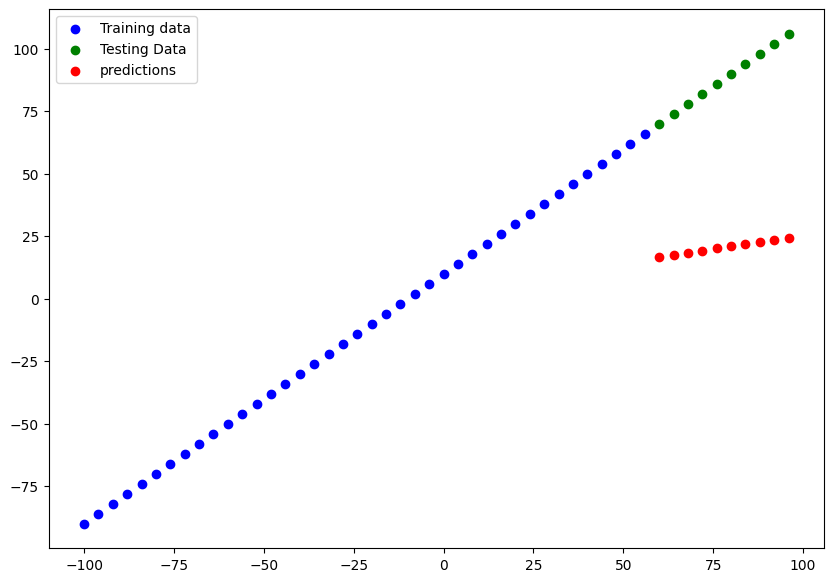

In [39]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [40]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(67.475815, 4636.7627)

**Comparing Results**

In [41]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

In [42]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])

In [43]:
all_results

,model,mae,mse
0,model_1,21.261444,455.479889
1,model_2,30.071478,935.940430
2,model_3,67.475815,4636.762695


In [45]:
model_1.save('best_model_savedmodel_format')

INFO:tensorflow:Assets written to: best_model_savedmodel_format\assets


INFO:tensorflow:Assets written to: best_model_savedmodel_format\assets


In [49]:
model_1.save("best_model_HDF5_format.h5")

In [51]:
!ls best_model_HDF5_format.h5

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [52]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Compare model_2 with the SavedModel version (should return True)
model_1_preds = model_1.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_1_preds.squeeze()).numpy()

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 33ms/step


True

In [54]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_1_preds.squeeze()).numpy()

1/1 [==============================] - 0s 29ms/step


True